<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_37_Medical_Insurance_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement & Objective
 

Imagine yourself working as a data scientist in an insurance company. Your manager asked you to come up with a data science solution to estimate the medical cost of an individual who has bought health insurance in the institution. **Build a machine learning model to estimate the medical cost of an individual**.

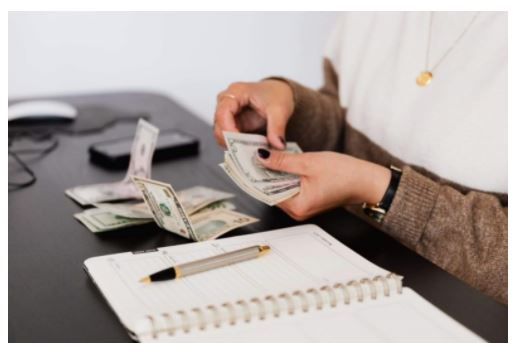

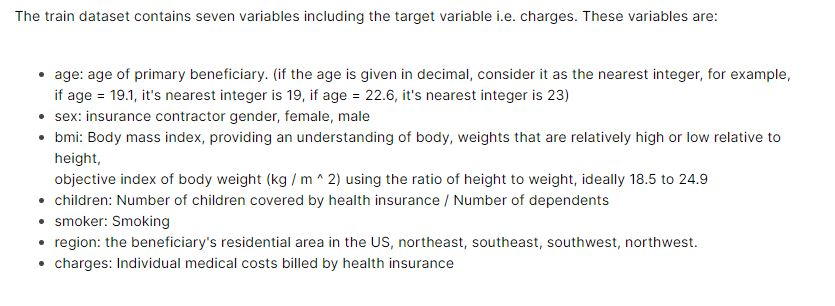

## Evaluation Matrix

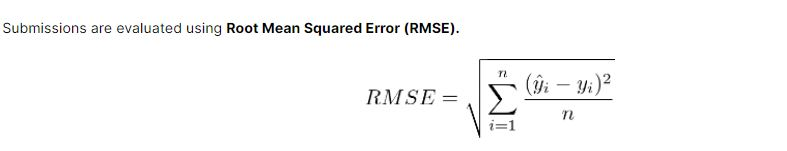

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Data Processing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
train = pd.read_csv("/content/drive/MyDrive/dphi/Train_Data_medical_cost.csv")
test = pd.read_csv("/content/drive/MyDrive/dphi/Medical_csot_test.csv")
sub = pd.read_csv("/content/drive/MyDrive/dphi/Sample_Submission_medical_cost.csv")

In [4]:
train.shape,test.shape

((3630, 7), (492, 6))

In [137]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## Summary Ststistics - Train data

In [6]:
train.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


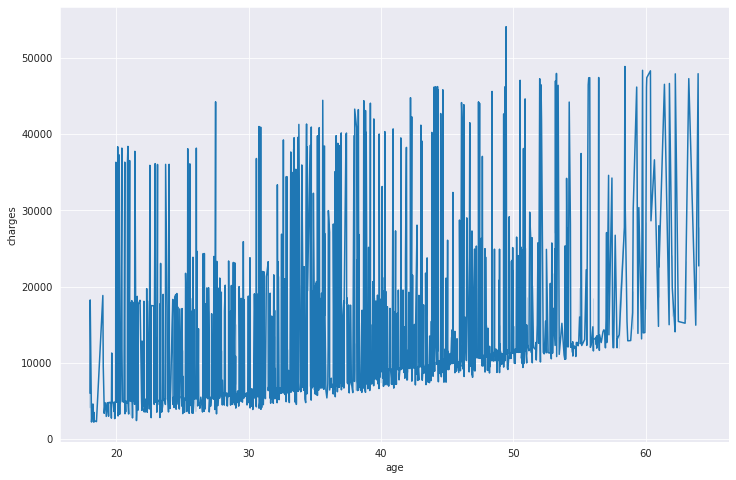

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='age',y='charges',data=train)

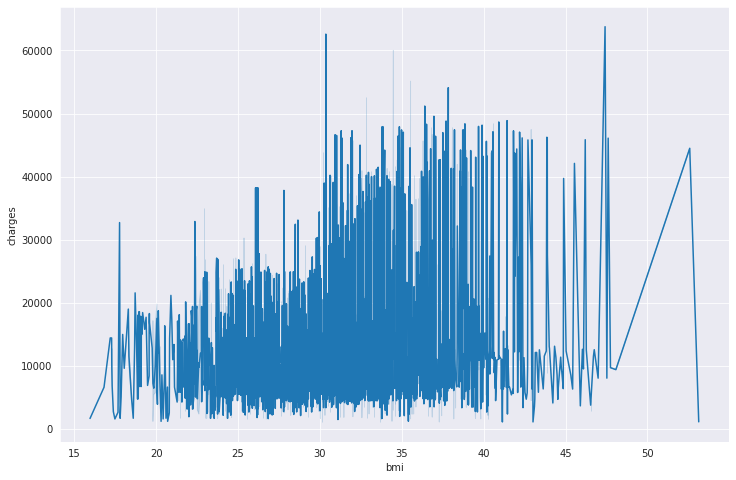

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='bmi',y='charges',data=train)

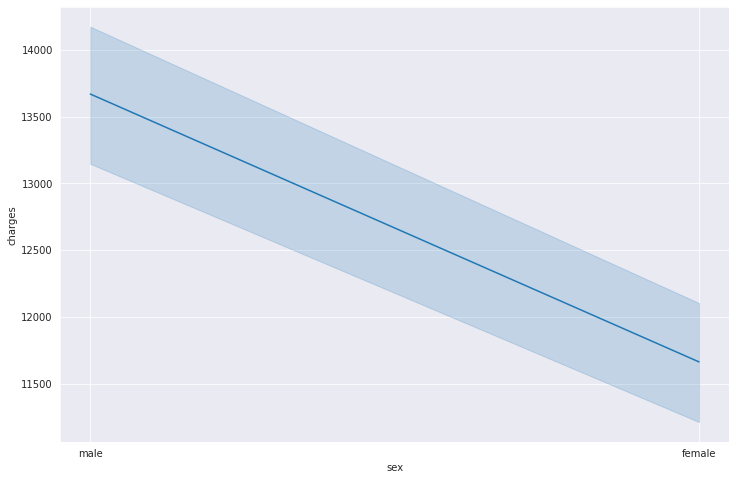

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='sex',y='charges',data=train)

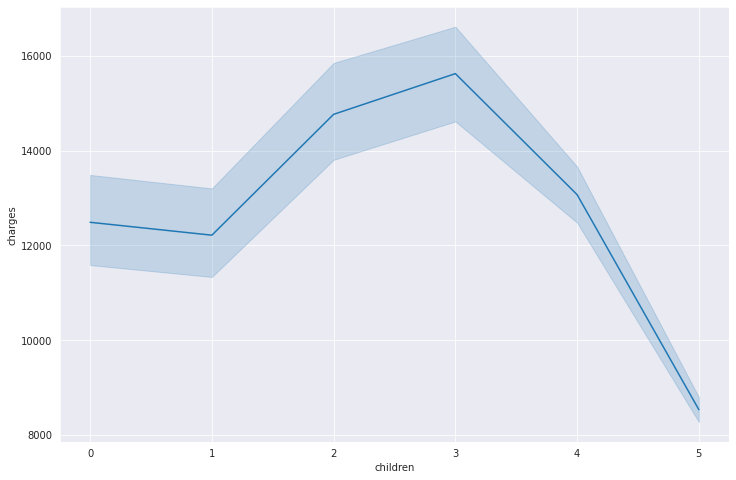

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='children',y='charges',data=train)

## Summary Statistics - Test data

In [ ]:
test.describe()

,age,bmi,children
count,492.000000,492.000000,492.000000
mean,38.840527,30.682976,2.512195
std,12.408765,5.426067,1.684315
min,18.000000,16.815000,0.000000
25%,28.754692,26.991596,1.000000
50%,39.051877,29.979531,2.000000
75%,49.000001,33.776529,4.000000
max,64.000000,50.380000,5.000000


In [9]:
train['age_group']  = pd.cut(train['age'],bins=[15, 30, 45, 60,75],labels=['15-30','31-45','46-60','61-75'])

In [10]:
test['age_group'] = pd.cut(test['age'],bins=[15, 30, 45, 60,75],labels=['15-30','31-45','46-60','61-75'])

In [11]:
train.head()

,age,sex,bmi,smoker,region,children,charges,age_group
0,21.000000,male,25.745000,no,northeast,2,3279.868550,15-30
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,31-45
2,18.000000,male,30.030000,no,southeast,1,1720.353700,15-30
3,37.000000,male,30.676891,no,northeast,3,6801.437542,31-45
4,58.000000,male,32.010000,no,southeast,1,11946.625900,46-60


In [12]:
train.isnull().sum()

age          0
sex          0
bmi          0
smoker       0
region       0
children     0
charges      0
age_group    0
dtype: int64

In [13]:
train['bmi_bins']=pd.cut(train['bmi'],bins=[15, 30, 45, 60],labels=['15-30','31-45','46-60'])

In [14]:
test['bmi_bins']= pd.cut(test['bmi'],bins=[15, 30, 45, 60],labels=['15-30','31-45','46-60'])

In [15]:
train.head()

,age,sex,bmi,smoker,region,children,charges,age_group,bmi_bins
0,21.000000,male,25.745000,no,northeast,2,3279.868550,15-30,15-30
1,36.976978,female,25.744165,yes,southeast,3,21454.494239,31-45,15-30
2,18.000000,male,30.030000,no,southeast,1,1720.353700,15-30,31-45
3,37.000000,male,30.676891,no,northeast,3,6801.437542,31-45,31-45
4,58.000000,male,32.010000,no,southeast,1,11946.625900,46-60,31-45


In [16]:
train_new = train[['age_group','bmi_bins','sex','smoker','region','children','charges']]
test_new = test[['age_group','bmi_bins','sex','smoker','region','children']]

## Export Processed data to drive

In [17]:
train_new.to_csv("/content/drive/MyDrive/dphi/train_processed.csv",index=False)

In [18]:
test_new.to_csv("/content/drive/MyDrive/dphi/test_processed.csv",index=False)

In [19]:
train_new.isnull().sum()

age_group    0
bmi_bins     0
sex          0
smoker       0
region       0
children     0
charges      0
dtype: int64

In [20]:
test_new.isnull().sum()

age_group    0
bmi_bins     0
sex          0
smoker       0
region       0
children     0
dtype: int64

## Install Pycaret

In [21]:
pip install pycaret[full]

     |████████████████████████████████| 266kB 16.2MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 1.4MB 28.4MB/s 
     |████████████████████████████████| 6.8MB 43.1MB/s 
     |████████████████████████████████| 1.7MB 40.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 276kB 48.5MB/s 
     |████████████████████████████████| 256kB 49.3MB/s 
     |████████████████████████████████| 174kB 35.9MB/s 
     |████████████████████████████████| 2.0MB 41.9MB/s 
     |████████████████████████████████| 112kB 54.9MB/s 
     |████████████████████████████████| 14.2MB 333kB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 348kB 50.0MB/s 
     |████████████████████████████████| 49.4MB 103kB/s 
     |████████████████████████████████| 307kB 50.9M

## Import Pycaret packages

In [7]:
import pandas as pd
import numpy as np
import pycaret
from pycaret.regression import *

## Load Original data

In [8]:
train = pd.read_csv("/content/drive/MyDrive/dphi/Train_Data_medical_cost.csv")
test = pd.read_csv("/content/drive/MyDrive/dphi/Medical_csot_test.csv")
sub = pd.read_csv("/content/drive/MyDrive/dphi/Sample_Submission_medical_cost.csv")

# Load Processed Data

In [24]:
train_p = pd.read_csv("/content/drive/MyDrive/dphi/train_processed.csv")
test_p = pd.read_csv("/content/drive/MyDrive/dphi/test_processed.csv")

In [150]:
test.head()

,age,sex,bmi,smoker,region,children
0,40.000000,male,29.900000,no,southwest,2
1,47.000000,male,32.300000,no,southwest,1
2,54.000000,female,28.880000,no,northeast,2
3,37.000000,male,30.568094,no,northeast,3
4,59.130049,male,33.132854,yes,northeast,4


In [163]:
sex_mapper = {k:v for v,k in enumerate(train.sex.value_counts().index.tolist())}

In [164]:
sex_mapper

{'female': 1, 'male': 0}

In [161]:
train_mapper = {k:v for v,k in enumerate(train.smoker.value_counts().index.tolist())}

In [162]:
train_mapper

{'no': 0, 'yes': 1}

In [159]:
region_mapper = {k:v for v,k in enumerate(train.region.value_counts().index.tolist())}

In [160]:
region_mapper

{'northeast': 3, 'northwest': 1, 'southeast': 0, 'southwest': 2}

In [165]:
X = train.drop('charges',axis=1)
Y = train['charges']

In [166]:
X['sex'] = X['sex'].map(sex_mapper)
X['region']  = X['region'].map(region_mapper)
X['smoker'] = X['smoker'].map(train_mapper)

In [167]:
X.head()

,age,sex,bmi,smoker,region,children
0,21.000000,0,25.745000,0,3,2
1,36.976978,1,25.744165,1,0,3
2,18.000000,0,30.030000,0,0,1
3,37.000000,0,30.676891,0,3,3
4,58.000000,0,32.010000,0,0,1


In [208]:
t = test.copy()

In [209]:
t['sex'] = t['sex'].map(sex_mapper)
t['region']  = t['region'].map(region_mapper)
t['smoker'] = t['smoker'].map(train_mapper)

##LightgbmRegressor

In [185]:
%%capture
!pip install --upgrade scikit-optimize

In [186]:
from skopt import gp_minimize

In [182]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [183]:
model = LGBMRegressor()

In [184]:
model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [192]:
np.random.uniform(0.001,0.01)

0.0028334650460702508

In [193]:
from functools import partial
from skopt import *
# define a parameter space
param_space = [
# max_depth is an integer between 3 and 10
space.Integer(3, 15, name="max_depth"),
# n_estimators is an integer between 50 and 1500
space.Integer(31, 50, name="num_leaves"),
# criterion is a category. here we define list of categories
space.Categorical(["regression", "quantile"], name="objective"),
# you can also have Real numbered space and define a
# distribution you want to pick it from
space.Real(0.001, 0.01, prior="uniform", name="learning_rate")
]

In [194]:
# make a list of param names
# this has to be same order as the search space
# inside the main function
param_names = [
"max_depth",
"num_leaves",
"objective",
"learning_rate"
]

In [201]:
def optimize(params, param_names, x, y):
  # convert params to dictionary
  params = dict(zip(param_names, params))
  # initialize model with current parameters
  model = LGBMRegressor(**params)
  # initialize stratified k-fold
  kf = KFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x[train_idx],x[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = np.sqrt(mean_squared_error(ytest,preds))
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

In [202]:
optimization_function = partial(optimize,param_names=param_names,x=X.values,y=Y.values)

In [203]:
result = gp_minimize(
optimization_function,
dimensions=param_space,
n_calls=15,
n_random_starts=10,
verbose=10
)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1455
Function value obtained: -8207.4691
Current minimum: -8207.4691
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4815
Function value obtained: -9726.0861
Current minimum: -9726.0861
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3618
Function value obtained: -10661.3765
Current minimum: -10661.3765
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.4009
Function value obtained: -11465.6930
Current minimum: -11465.6930
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.3756
Function value obtained: -17118.5334
Current minimum: -

In [204]:
result.x

[3, 31, 'quantile', 0.001]

In [205]:
# create best params dict and print it
best_params = dict(zip(param_names,result.x))
print(best_params)

{'max_depth': 3, 'num_leaves': 31, 'objective': 'quantile', 'learning_rate': 0.001}


Running 1 iteration
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
17311.785483576998
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
17898.93121488097
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
18185.170858845762
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
17094.59615922363
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
17988.8852584275
Running 2 iteration
[LightGBM] [Warning] Auto-choosing col-wise 

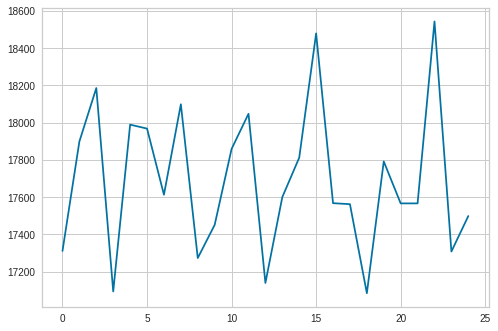

In [206]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import mean_squared_error
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 5, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp.iloc[train_index],temp.iloc[test_index]
        ytrain,ytest = target.iloc[train_index],target.iloc[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = LGBMRegressor(max_depth = 3, 
                              num_leaves = 31, 
                              objective = 'quantile', 
                              learning_rate = 0.001,
                              verbose=0)
        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [210]:
preds = model.predict(t)

In [211]:
t['prediction'] =preds

In [212]:
t.head()

,age,sex,bmi,smoker,region,children,prediction
0,40.000000,0,29.900000,0,2,2,26703.668543
1,47.000000,0,32.300000,0,2,1,26745.107436
2,54.000000,1,28.880000,0,3,2,26940.702250
3,37.000000,0,30.568094,0,3,3,26977.299277
4,59.130049,0,33.132854,1,3,4,29797.751469


## CatboostRegressor

In [117]:
from catboost import CatBoostRegressor,Pool
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor(loss_function='RMSE')

In [118]:
X = train_p.drop('charges',axis=1)
Y = train_p['charges']

In [112]:
cat_cols = [col for col in X.columns if X[col].dtypes == 'O']
cat_cols

['age_group', 'bmi_bins', 'sex', 'smoker', 'region']

In [119]:
train_dataset = Pool(X,Y,cat_features=cat_cols) 
#test_dataset = cb.Pool(X_test, y_test)

In [120]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1,0.001],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
46:	learn: 4298.9238345	test: 4479.9882189	best: 4479.9882189 (46)	total: 95.6ms	remaining: 108ms
47:	learn: 4281.5261800	test: 4471.2919589	best: 4471.2919589 (47)	total: 98ms	remaining: 106ms
48:	learn: 4280.6882664	test: 4468.9155289	best: 4468.9155289 (48)	total: 98.6ms	remaining: 103ms
49:	learn: 4257.4581000	test: 4459.9003363	best: 4459.9003363 (49)	total: 101ms	remaining: 101ms
50:	learn: 4255.1559264	test: 4457.2685346	best: 4457.2685346 (50)	total: 102ms	remaining: 98.2ms
51:	learn: 4251.6756793	test: 4452.7705577	best: 4452.7705577 (51)	total: 103ms	remaining: 95.4ms
52:	learn: 4237.6977154	test: 4453.4638024	best: 4452.7705577 (51)	total: 106ms	remaining: 93.9ms
53:	learn: 4236.4604976	test: 4452.6987959	best: 4452.6987959 (53)	total: 107ms	remaining: 90.9ms
54:	learn: 4224.7244248	test: 4440.3568729	best: 4440.3568729 (54)	total: 109ms	remaining: 89.4ms
55:	learn: 4200.5287163	test: 4418.0389952	best: 4418.0389952 (55)	tot

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

Running 1 iteration
4210.71964980859
3978.2139185546052
3718.749375845575
3947.178676077012
3888.12764363683
Running 2 iteration
4351.998780529205
3621.176808623419
3819.2637180219767
3764.240586919472
4156.316739693687
Running 3 iteration
3704.134699802679
4139.802197455785
4178.221416618722
3597.1754179428362
4142.407462957646
Running 4 iteration
3969.8661274517544
4126.730504315092
3731.8647821126974
3940.379103390663
3928.409851141013
Running 5 iteration
3626.912607252472
3949.451887768872
4060.2808053986278
4034.145899009181
4237.655043110133
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
3597.1754179428362 4351.998780529205 3952.9369481375415


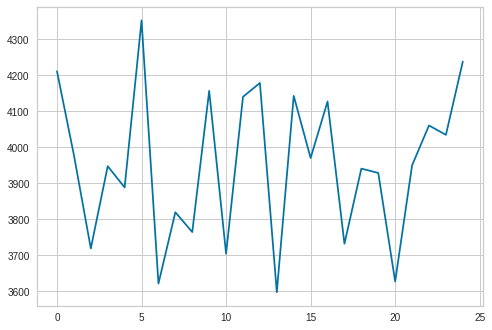

In [131]:
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import mean_squared_error
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 5, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp.iloc[train_index],temp.iloc[test_index]
        ytrain,ytest = target.iloc[train_index],target.iloc[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostRegressor(max_depth=8,
                                   iterations=200,
                                   loss_function='RMSE',
                                   learning_rate=0.1,
                                   l2_leaf_reg=0.5,verbose=0)
        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [124]:
from sklearn.metrics import mean_squared_error,r2_score
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = CatBoostRegressor(max_depth=8,
                                   iterations=200,
                                   loss_function='RMSE',
                                   learning_rate=0.1,
                                   l2_leaf_reg=0.5,verbose=0)
model.fit(X_train,y_train,cat_features = cat_cols)
y_pred = model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 4032.52
R2: 0.86


## Make Predictions on test data

In [132]:
preds = model.predict(test_p)

In [133]:
test_p['prediction'] = preds

In [134]:
test_p.head()

,age_group,bmi_bins,sex,smoker,region,children,charges,prediction
0,31-45,15-30,male,no,southwest,2,7779.973740,7179.958297
1,46-60,31-45,male,no,southwest,1,12179.962437,11986.461512
2,46-60,15-30,female,no,northeast,2,12087.297597,11504.122653
3,31-45,31-45,male,no,northeast,3,7947.315029,8902.930714
4,46-60,31-45,male,yes,northeast,4,31829.694785,31889.671629


In [135]:
test_p[['prediction']].to_csv("catboostreg1.csv",index=False)

**Submission successful! Your score is 4387.798631237074.**

In [10]:
import pycaret
from pycaret.regression import *

In [40]:
train_processed = pd.read_csv("/content/drive/MyDrive/dphi/train_processed.csv")
test_processed = pd.read_csv("/content/drive/MyDrive/dphi/test_processed.csv")

## Setup Pycaret Environment

In [41]:
reg = setup(data = train_processed, target = 'charges',preprocess=True,log_data=True,log_experiment=True,normalize=True)

,Description,Value
0,session_id,428
1,Target,charges
2,Original Data,"(3630, 7)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2540, 19)"


In [ ]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2187.7312,1.964724e+07,4432.5211,0.8347,0.3657,0.2035
1,2126.5531,1.667692e+07,4083.7381,0.8460,0.3088,0.2106
2,2063.3185,1.471740e+07,3836.3259,0.8824,0.3040,0.1890
3,1907.1995,1.164621e+07,3412.6537,0.8963,0.2940,0.1993
4,2249.6154,1.892641e+07,4350.4495,0.8272,0.3197,0.1999
5,1923.3445,1.280313e+07,3578.1455,0.8885,0.3179,0.2323
6,2110.7967,1.600789e+07,4000.9862,0.8742,0.3186,0.2108
7,1692.6690,1.124144e+07,3352.8260,0.8790,0.3075,0.1721
8,2054.6945,1.485916e+07,3854.7579,0.8754,0.3200,0.1967
9,1945.7391,1.214243e+07,3484.5983,0.8863,0.2960,0.1980


In [ ]:
# tune hyperparameters with optuna
tuned_cat_optuna = tune_model(cat, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2328.4812,1.874862e+07,4329.9674,0.8423,0.3493,0.2212
1,2286.7388,1.894542e+07,4352.6334,0.8250,0.3134,0.2244
2,2299.7496,1.670748e+07,4087.4781,0.8665,0.3244,0.2261
3,2045.1874,1.400949e+07,3742.9256,0.8753,0.3064,0.2220
4,2377.0779,2.029022e+07,4504.4664,0.8148,0.3474,0.2131
5,1822.8537,9.968659e+06,3157.3184,0.9132,0.2793,0.2164
6,2132.0335,1.550957e+07,3938.2188,0.8781,0.3081,0.2123
7,1890.0170,1.339923e+07,3660.4954,0.8558,0.2871,0.1779
8,2163.3533,1.448573e+07,3806.0120,0.8786,0.3241,0.2074
9,2129.1307,1.310797e+07,3620.4928,0.8773,0.3148,0.2250


## Evaluate Model

In [ ]:
evaluate_model(tuned_cat_optuna)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Prediction on validation set

In [ ]:
hold_out = predict_model(tuned_cat_optuna)
hold_out

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2219.857,1.703737e+07,4127.6349,0.8575,0.3341,0.2147


,age_group_15-30,age_group_31-45,age_group_46-60,age_group_61-75,bmi_bins_15-30,bmi_bins_31-45,bmi_bins_46-60,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,charges,Label
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12479.708984,12606.005670
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41949.242188,40240.526870
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10576.416016,12663.394217
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5385.337891,6680.744430
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1149.395874,3022.069264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8347.164062,12684.948719
1086,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4402.463867,4528.315135
1087,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2104.113281,3110.749717
1088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10607.005859,12663.394217


## Predictions on the test data

In [ ]:
# predictions on new dataset
cat_pred_new = predict_model(tuned_cat_optuna, data = test) #new_data is pd dataframe

In [ ]:
cat_pred_new

,age_group,bmi_bins,sex,smoker,region,children,Label
0,31-45,15-30,male,no,southwest,2,8104.492699
1,46-60,31-45,male,no,southwest,1,11736.472233
2,46-60,15-30,female,no,northeast,2,11856.538634
3,31-45,31-45,male,no,northeast,3,8025.907392
4,46-60,31-45,male,yes,northeast,4,32925.999882
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,11542.668545
488,31-45,31-45,male,no,southwest,5,7580.768211
489,46-60,15-30,male,no,northeast,4,16486.905073
490,31-45,15-30,female,no,southeast,5,9871.630684


In [ ]:
test['prediction'] = cat_pred_new['Label']

In [ ]:
test[['prediction']].to_csv('dphi_pycaret.csv',index=False)

**Submission successful! Your score is 4327.975864960259**

## Analyzing model performance in PyCaret 

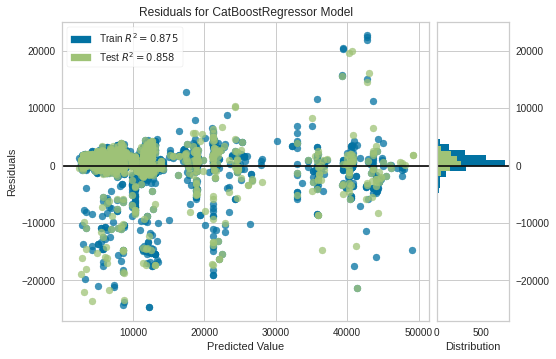

In [ ]:
plot_model(tuned_cat_optuna)

## Comapre Models

In [26]:
best = compare_models(n_select = 15,sort='RMSE')
compare_model_results = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2123.3749,1.525343e+07,3866.0105,0.8632,0.3238,0.2112,0.063
gbr,Gradient Boosting Regressor,2167.4382,1.589565e+07,3941.8534,0.8578,0.3244,0.2182,0.140
catboost,CatBoost Regressor,2145.0353,1.648732e+07,4025.1236,0.8519,0.3287,0.2128,0.696
rf,Random Forest Regressor,2153.7171,1.663512e+07,4044.6846,0.8505,0.3371,0.2161,0.855
xgboost,Extreme Gradient Boosting,2174.5806,1.711321e+07,4106.9316,0.8461,0.3376,0.2164,0.933
et,Extra Trees Regressor,2192.2122,1.752198e+07,4160.3719,0.8427,0.3418,0.2178,0.877
dt,Decision Tree Regressor,2191.7374,1.754405e+07,4163.0865,0.8426,0.3421,0.2181,0.011
ada,AdaBoost Regressor,4292.1151,2.861249e+07,5320.1750,0.7468,0.5483,0.6134,0.049
lasso,Lasso Regression,4021.9583,3.268535e+07,5700.5241,0.7086,0.4577,0.3913,0.016
llar,Lasso Least Angle Regression,4020.1792,3.268876e+07,5700.6818,0.7086,0.4525,0.3940,0.015


## Build Lightgbm Models based on the Comparison between models

In [ ]:
lgb = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2148.9362,1.647777e+07,4059.2824,0.8614,0.3556,0.2056
1,2250.4202,1.761402e+07,4196.9061,0.8373,0.3151,0.2221
2,2151.0736,1.523171e+07,3902.7827,0.8783,0.3049,0.1980
3,2048.5623,1.294756e+07,3598.2714,0.8847,0.2955,0.2101
4,2352.3694,1.981786e+07,4451.7251,0.8191,0.3294,0.2048
5,1835.8305,1.102613e+07,3320.5624,0.9039,0.2987,0.2163
6,2049.0498,1.423738e+07,3773.2457,0.8881,0.3068,0.2041
7,1815.7999,1.187105e+07,3445.4387,0.8723,0.3009,0.1756
8,2071.2445,1.369629e+07,3700.8505,0.8852,0.3115,0.1961
9,1980.7393,1.199117e+07,3462.8265,0.8877,0.2938,0.2013


In [ ]:
# tune hyperparameters with optuna
tuned_lgb_optuna = tune_model(lgb, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2573.7314,2.226581e+07,4718.6660,0.8127,0.3758,0.2511
1,2349.7840,1.976388e+07,4445.6584,0.8175,0.3227,0.2345
2,2474.1136,1.744127e+07,4176.2747,0.8607,0.3324,0.2450
3,2222.2148,1.526345e+07,3906.8467,0.8641,0.3153,0.2376
4,2584.3118,2.052398e+07,4530.3403,0.8126,0.3505,0.2466
5,1979.6495,1.108588e+07,3329.5465,0.9034,0.2851,0.2280
6,2353.2968,1.705702e+07,4130.0144,0.8660,0.3323,0.2347
7,2168.5644,1.627263e+07,4033.9350,0.8249,0.3156,0.2053
8,2338.4664,1.606900e+07,4008.6152,0.8653,0.3383,0.2264
9,2402.6096,1.598714e+07,3998.3920,0.8503,0.3223,0.2422


In [ ]:
evaluate_model(tuned_lgb_optuna)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

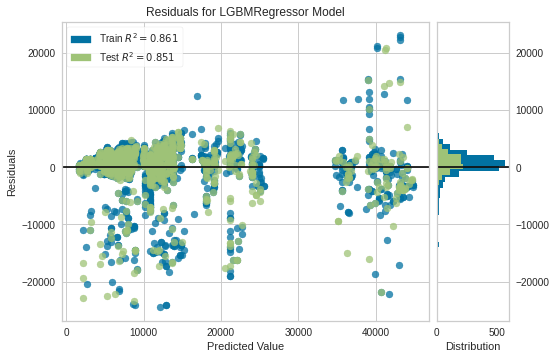

In [ ]:
plot_model(tuned_lgb_optuna)

In [ ]:
hold_out = predict_model(tuned_lgb_optuna)
hold_out

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2393.4639,1.783948e+07,4223.6811,0.8508,0.3428,0.2336


,age_group_15-30,age_group_31-45,age_group_46-60,age_group_61-75,bmi_bins_15-30,bmi_bins_31-45,bmi_bins_46-60,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,charges,Label
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12479.708984,13090.532776
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41949.242188,41370.495344
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10576.416016,14689.842127
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5385.337891,6249.954866
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1149.395874,2547.312146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8347.164062,14414.162193
1086,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4402.463867,5203.914499
1087,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2104.113281,3042.991734
1088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10607.005859,14689.842127


## Make Predictions

In [ ]:
# predictions on new dataset
lgb_pred_new = predict_model(tuned_lgb_optuna, data = test) #new_data is pd dataframe

In [ ]:
lgb_pred_new

,age_group,bmi_bins,sex,smoker,region,children,Label
0,31-45,15-30,male,no,southwest,2,7807.808882
1,46-60,31-45,male,no,southwest,1,12805.690329
2,46-60,15-30,female,no,northeast,2,11948.842058
3,31-45,31-45,male,no,northeast,3,7693.994232
4,46-60,31-45,male,yes,northeast,4,39179.511128
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,10884.098402
488,31-45,31-45,male,no,southwest,5,6850.623375
489,46-60,15-30,male,no,northeast,4,16272.533294
490,31-45,15-30,female,no,southeast,5,10050.164608


In [ ]:
lgb_pred_new = lgb_pred_new.rename(columns={'Label':'prediction'})

In [ ]:
lgb_pred_new[['prediction']].to_csv('dphi_pycaret_lgb.csv',index=False)

**Submission successful! Your score is 4383.9653643544.**

## Blend Models
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome.

In [42]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 10))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2177.4180,1.109315e+07,3330.6382,0.8998,0.3314,0.2634
1,2347.2106,1.531840e+07,3913.8734,0.8538,0.3077,0.2360
2,2579.0870,2.177135e+07,4665.9775,0.8065,0.3958,0.2737
3,2375.6135,1.530066e+07,3911.6052,0.8676,0.3405,0.2622
4,2603.6707,1.713106e+07,4138.9689,0.8727,0.3263,0.2727
5,2241.7545,1.522823e+07,3902.3369,0.8435,0.3105,0.2352
6,2539.4438,1.782159e+07,4221.5626,0.8293,0.3643,0.2767
7,2552.8249,1.965728e+07,4433.6534,0.8177,0.3816,0.2593
8,2169.6152,1.178614e+07,3433.0948,0.9068,0.3031,0.2499
9,2451.1716,1.876609e+07,4331.9847,0.8223,0.3462,0.2522


In [43]:
blender_specific 

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=428,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, subs...
                             Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=Non

In [ ]:
blender_specific 

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=7339,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, sub...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                             

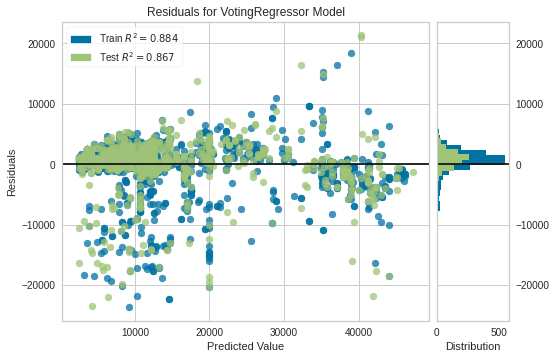

In [44]:
plot_model(blender_specific)

In [45]:
evaluate_model(blender_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = test_processed) #new_data is pd dataframe

In [48]:
pred_new = pred_new.rename(columns={'Label':'prediction'})

In [49]:
pred_new 

,age_group,bmi_bins,sex,smoker,region,children,prediction
0,31-45,15-30,male,no,southwest,2,7753.717508
1,46-60,31-45,male,no,southwest,1,12864.200656
2,46-60,15-30,female,no,northeast,2,11401.464109
3,31-45,31-45,male,no,northeast,3,8222.619537
4,46-60,31-45,male,yes,northeast,4,35094.007464
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,10864.197785
488,31-45,31-45,male,no,southwest,5,8001.865910
489,46-60,15-30,male,no,northeast,4,14332.923478
490,31-45,15-30,female,no,southeast,5,9274.087130


In [50]:
pred_new[['prediction']].to_csv('dphi_pycaret_blender_preprocess.csv',index=False)

**Blender Model Submission Submission successful! Your score is 4139.4076000571085**

## Model Stacking

In [55]:
# create individual models for stacking
lgb = create_model('lightgbm')
gbr = create_model('gbr')
cat = create_model('catboost')
rf = create_model('rf')
xgboost = create_model('xgboost')
# stacking models
stacker = stack_models(estimator_list = [lgb,gbr,cat,rf], meta_model = xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2079.5522,1.697172e+07,4119.6748,0.8588,0.3138,0.1834
1,2120.5415,1.448819e+07,3806.3352,0.8517,0.3045,0.2056
2,2469.2378,2.426714e+07,4926.1685,0.7604,0.4024,0.2146
3,2001.2463,1.257909e+07,3546.7017,0.8700,0.3596,0.2082
4,2435.3552,1.898912e+07,4357.6504,0.8340,0.3771,0.2296
5,2191.4822,1.945104e+07,4410.3330,0.8373,0.3763,0.1914
6,2473.2957,1.862978e+07,4316.2231,0.8369,0.3285,0.2491
7,2544.0007,2.561806e+07,5061.4287,0.7778,0.3744,0.2095
8,1936.4791,1.184974e+07,3442.3445,0.9133,0.3114,0.1915
9,2000.4019,1.448047e+07,3805.3208,0.8708,0.2691,0.1765


In [46]:
top3 = compare_models(n_select = 3)
stacker = stack_models(top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1909.1846,1.350747e+07,3675.2507,0.8876,0.3027,0.1900
1,1900.9442,1.059186e+07,3254.5140,0.8916,0.2749,0.1988
2,2214.8031,1.998011e+07,4469.9117,0.8028,0.3341,0.1932
3,1886.1771,1.116654e+07,3341.6378,0.8846,0.3166,0.2022
4,2347.5869,1.710929e+07,4136.3378,0.8504,0.3464,0.2170
5,2105.7570,1.780977e+07,4220.1626,0.8510,0.3562,0.1998
6,2315.7470,1.697594e+07,4120.1873,0.8514,0.3162,0.2453
7,2492.2332,2.327061e+07,4823.9619,0.7982,0.3679,0.2147
8,1780.6783,8.298884e+06,2880.7783,0.9393,0.2854,0.2053
9,1952.0839,1.271469e+07,3565.7669,0.8866,0.2712,0.1905


In [62]:
# stack models dynamically
top5 = compare_models(n_select = 5)
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2025.2772,1.521763e+07,3900.9779,0.8734,0.3006,0.1868
1,1989.6143,1.111750e+07,3334.2913,0.8862,0.3975,0.2108
2,2412.6715,2.350743e+07,4848.4460,0.7679,0.3633,0.2099
3,2020.2829,1.277541e+07,3574.2709,0.8680,0.3178,0.2102
4,2460.0133,1.935524e+07,4399.4595,0.8308,0.3770,0.2373
5,2137.5001,1.891871e+07,4349.5648,0.8417,0.3685,0.1995
6,2365.6374,1.748435e+07,4181.4294,0.8470,0.3307,0.2403
7,2566.1737,2.508132e+07,5008.1255,0.7825,0.3727,0.2268
8,2099.7798,1.166937e+07,3416.0461,0.9146,0.3271,0.2381
9,2020.1855,1.536420e+07,3919.7192,0.8629,0.2702,0.1829


In [63]:
stacker

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x7F6E0F81CC00,
   shuffle=False),
                  estimators=[('gbr',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_le...
       

In [64]:
top5

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5254, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                   

In [65]:
evaluate_model(stacker)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

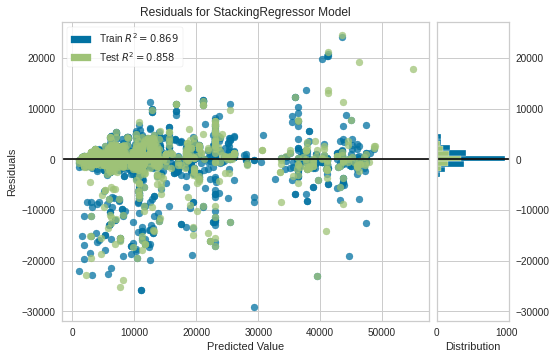

In [57]:
plot_model(stacker)

In [66]:
# predictions on new dataset
pred_new_stack = predict_model(stacker, data = test_p) #new_data is pd dataframe

In [67]:
pred_new_stack

,age_group,bmi_bins,sex,smoker,region,children,Label
0,31-45,15-30,male,no,southwest,2,6511.588050
1,46-60,31-45,male,no,southwest,1,12004.136532
2,46-60,15-30,female,no,northeast,2,11082.345639
3,31-45,31-45,male,no,northeast,3,6690.252510
4,46-60,31-45,male,yes,northeast,4,30849.500153
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,12834.379804
488,31-45,31-45,male,no,southwest,5,6638.860496
489,46-60,15-30,male,no,northeast,4,15634.634000
490,31-45,15-30,female,no,southeast,5,8768.036770


In [69]:
pred_new_stack = pred_new_stack.rename(columns={'Label':'prediction'})

In [70]:
pred_new_stack[['prediction']].to_csv('dphi_pycaret_stacker_3.csv',index=False)

**Stacking  score is 4464.725278050345.**

##Bagging method

In [72]:
# train a extratreeregressor model
et= create_model('et')
tuned_et = tune_model(et,search_library = 'optuna')
# train a adaboost classifier on dt with 100 estimators
boosted_dt = ensemble_model(et, method = 'Boosting', n_estimators = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2554.8328,2.066228e+07,4545.5786,0.8281,0.3912,0.2973
1,2526.5554,1.845312e+07,4295.7097,0.8111,0.3443,0.2741
2,2846.2926,2.431002e+07,4930.5192,0.7600,0.4360,0.3190
3,2773.9253,1.992486e+07,4463.7267,0.7941,0.4679,0.3858
4,3075.5480,2.539163e+07,5039.0113,0.7780,0.4489,0.3554
5,2599.9763,2.174020e+07,4662.6392,0.8181,0.4449,0.3116
6,2869.3251,2.086039e+07,4567.3174,0.8174,0.4337,0.3839
7,2663.1613,2.445393e+07,4945.0920,0.7879,0.4313,0.2896
8,2590.2536,1.570025e+07,3962.3538,0.8851,0.4336,0.3654
9,3325.4048,2.869234e+07,5356.5228,0.7440,0.4742,0.4422


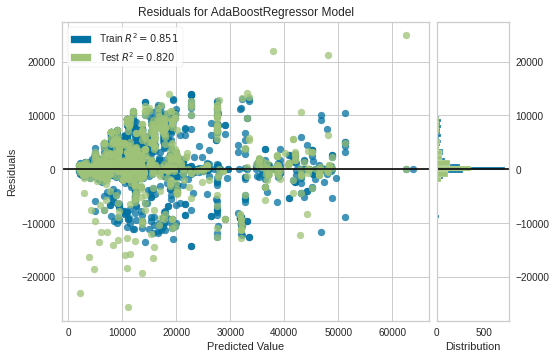

In [73]:
plot_model(boosted_dt)

In [74]:
evaluate_model(boosted_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [75]:
# predictions on new dataset
boost = predict_model(boosted_dt, data = test_p) #new_data is pd dataframe

In [76]:
boost = boost.rename(columns={'Label':'prediction'})

In [77]:
boost

,age_group,bmi_bins,sex,smoker,region,children,prediction
0,31-45,15-30,male,no,southwest,2,7726.854004
1,46-60,31-45,male,no,southwest,1,17532.257061
2,46-60,15-30,female,no,northeast,2,11531.551147
3,31-45,31-45,male,no,northeast,3,6593.264757
4,46-60,31-45,male,yes,northeast,4,32754.615723
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,17648.846484
488,31-45,31-45,male,no,southwest,5,6593.229763
489,46-60,15-30,male,no,northeast,4,14092.307292
490,31-45,15-30,female,no,southeast,5,9422.802897


In [78]:
boost[['prediction']].to_csv('dphi_pycaret_boost.csv',index=False)

**Submission successful! Your score is 5143.377375234426**

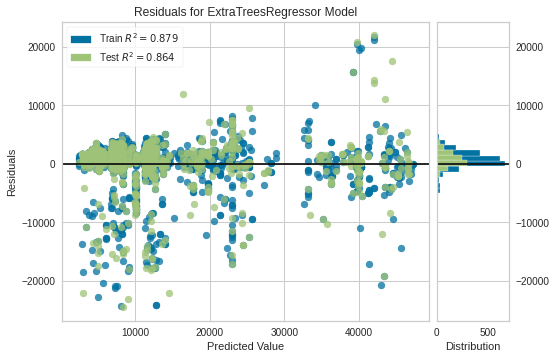

In [79]:
plot_model(tuned_et)

In [80]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [81]:
et_pred = predict_model(tuned_et, data = test_p) #new_data is pd dataframe

In [82]:
et_pred

,age_group,bmi_bins,sex,smoker,region,children,Label
0,31-45,15-30,male,no,southwest,2,8277.853552
1,46-60,31-45,male,no,southwest,1,12096.568320
2,46-60,15-30,female,no,northeast,2,11776.636532
3,31-45,31-45,male,no,northeast,3,7129.826069
4,46-60,31-45,male,yes,northeast,4,33113.183283
...,...,...,...,...,...,...,...
487,46-60,15-30,male,no,northeast,1,11673.857815
488,31-45,31-45,male,no,southwest,5,7190.939554
489,46-60,15-30,male,no,northeast,4,12587.309744
490,31-45,15-30,female,no,southeast,5,10002.752671


In [83]:
et_pred = et_pred.rename(columns={'Label':'prediction'})

In [84]:
et_pred[['prediction']].to_csv('dphi_pycaret_et.csv',index=False)

**Submission successful! Your score is 4365.577403388456**

##Save Models

In [51]:
save_model(blender_specific , '/content/drive/MyDrive/dphi/blender_specific_saved_06142021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                     fit_intercept=True,
                                                     max_iter=None,
                                                     normalize=False,
                                                     random_state=428,
                               

In [52]:
# Loading the saved model
blend_saved = load_model('/content/drive/MyDrive/dphi/blender_specific_saved_06142021')

Transformation Pipeline and Model Successfully Loaded


In [54]:
pred = blend_saved.predict(test_processed)

In [55]:
pred[:5]

array([ 7753.71750756, 12864.20065627, 11401.46410899,  8222.61953705,
       35094.0074637 ])

## Interfaces for  ML Models using Gradio

Gradio allows you to quickly create customizable UI components around your TensorFlow or PyTorch models, or even arbitrary Python functions. Mix and match components to support any combination of inputs and outputs. Our core library is free and open-source!

In [23]:
!pip install -q gradio

In [24]:
import gradio as gr

## Create Preprocessing functions

In [56]:
def encode_attributes(df): # Binning ages 
    age = df.age.values.tolist()[0]
    bmi = df.bmi.values.tolist()[0]
    if age > 15 and age <= 30:
      df['age_group'] = '15-30'
    elif age > 30 and age <= 45:
      df['age_group'] = '31-45'
    elif age > 45 and age <= 60:
      df['age_group'] = '46-60'
    else:
      df['age_group'] = '61-75'
    #
    if bmi > 15 and bmi <= 30:
      df['bmi_bins'] = '15-30'
    elif bmi > 30 and bmi <= 45:
      df['bmi_bins'] = '31-45'
    else:
      df['bmi_bins'] = '46-60'
      
    df = df[['age_group','bmi_bins','sex','smoker','region','children']]
    return df

## Create Predict Function

In [57]:
def predict_charges(age, bmi,sex,smoker,region,children):
    df = pd.DataFrame.from_dict({'sex': [sex], 'age': [age], 'smoker': [smoker],'bmi':[bmi],'region':[region],'children':[children]})
    df = encode_attributes(df)
    pred = blend_saved.predict(df).tolist()[0]
    return 'charges : '+str(pred)+" in rupees"

## Test Predict Function

In [58]:
predict_charges(age=17, bmi=30,sex='male',smoker='no',region='northwest',children=2)

'charges : 5622.4158944553765 in rupees'

## Build a shareable UI 

In [59]:
sex = gr.inputs.Radio(['female', 'male'], label="sex")
smoker = gr.inputs.Radio(['no', 'yes'], label="smoker")
children = gr.inputs.Radio([2, 3, 1, 4, 5, 0], label="children")
region = gr.inputs.Radio(['northeast', 'southeast', 'northwest', 'southwest'], label="region")
age = gr.inputs.Slider(minimum=15, maximum=75, default=16, label="age")
bmi = gr.inputs.Slider(minimum=15, maximum=60, default=16, label="bmi")


gr.Interface(predict_charges, inputs=[age, bmi,sex,smoker,region,children], 
             outputs="label",
             title="Medical Insurance Cost Prediction",
             capture_session=True,
             live=True).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://36096.gradio.app
Interface loading below...
